In [1]:
!pip install tensorflow opencv-python matplotlib scikit-learn seaborn

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

/tmp/ipython-input-2111781912.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


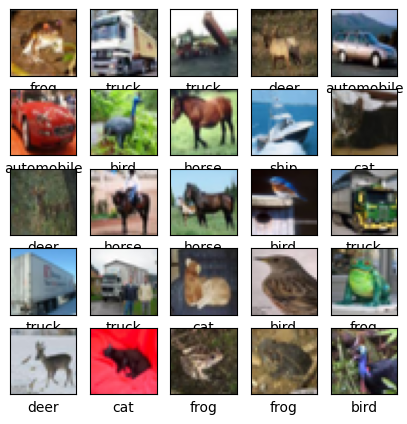

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3655 - loss: 1.7340 - val_accuracy: 0.5464 - val_loss: 1.2610
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.5824 - loss: 1.1795 - val_accuracy: 0.6155 - val_loss: 1.1076
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6358 - loss: 1.0355 - val_accuracy: 0.6303 - val_loss: 1.0296
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.6684 - loss: 0.9494 - val_accuracy: 0.6619 - val_loss: 0.9694
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.6953 - loss: 0.8769 - val_accuracy: 0.6663 - val_loss: 0.9731


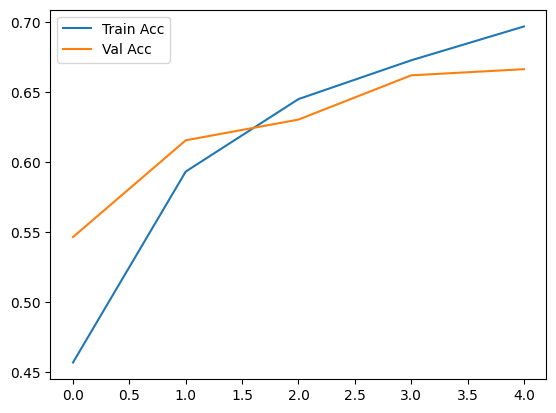

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

aug_model = tf.keras.models.clone_model(model)
aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

aug_history = aug_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                            validation_data=(x_test, y_test),
                            epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 114ms/step - accuracy: 0.3351 - loss: 1.8064 - val_accuracy: 0.5274 - val_loss: 1.3348
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.5125 - loss: 1.3697 - val_accuracy: 0.5779 - val_loss: 1.1838
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.5634 - loss: 1.2412 - val_accuracy: 0.6189 - val_loss: 1.1024
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.5913 - loss: 1.1652 - val_accuracy: 0.6249 - val_loss: 1.0698
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.6162 - loss: 1.0887 - val_accuracy: 0.6586 - val_loss: 1.0124


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

    airplane       0.63      0.77      0.69      1000
  automobile       0.83      0.72      0.77      1000
        bird       0.54      0.58      0.56      1000
         cat       0.57      0.38      0.45      1000
        deer       0.61      0.64      0.62      1000
         dog       0.67      0.46      0.55      1000
        frog       0.80      0.69      0.74      1000
       horse       0.65      0.75      0.70      1000
        ship       0.68      0.86      0.76      1000
       truck       0.71      0.80      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



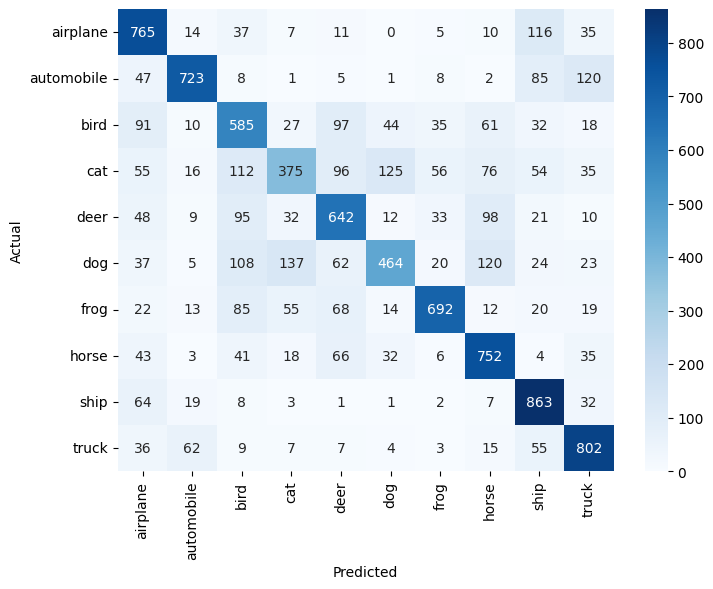

In [10]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [11]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False

from tensorflow.keras import Sequential
transfer_model = Sequential([
    tf.keras.layers.Resizing(96, 96),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

transfer_history = transfer_model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 428s 270ms/step - accuracy: 0.7016 - loss: 0.8606 - val_accuracy: 0.7796 - val_loss: 0.6406
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 428s 261ms/step - accuracy: 0.8077 - loss: 0.5488 - val_accuracy: 0.7963 - val_loss: 0.5752
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 408s 261ms/step - accuracy: 0.8270 - loss: 0.4889 - val_accuracy: 0.7970 - val_loss: 0.5873


In [12]:
model.save("cnn_model.h5")
transfer_model.save("mobilenetv2_model.h5")

sample_images = x_test[:10]
preds = np.argmax(transfer_model.predict(sample_images), axis=1)
print(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[3 1 8 0 6 6 1 4 3 1]


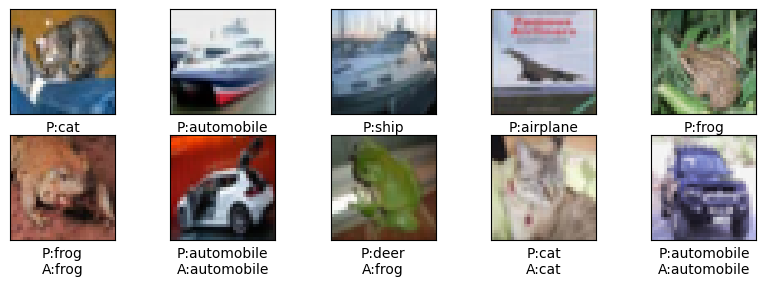

In [15]:
import matplotlib.pyplot as plt

sample_labels = y_test[:10].flatten()
plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_images[i])
    plt.xlabel(f"P:{class_names[preds[i]]}\nA:{class_names[sample_labels[i]]}")
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(model, x, y):
    preds = np.argmax(model.predict(x), axis=1)
    y_true = y.flatten()
    acc = np.mean(preds == y_true)
    precision = precision_score(y_true, preds, average='macro')
    recall = recall_score(y_true, preds, average='macro')
    f1 = f1_score(y_true, preds, average='macro')
    return acc, precision, recall, f1

cnn_acc, cnn_prec, cnn_rec, cnn_f1 = get_metrics(model, x_test, y_test)
aug_acc, aug_prec, aug_rec, aug_f1 = get_metrics(aug_model, x_test, y_test)
tl_acc, tl_prec, tl_rec, tl_f1 = get_metrics(transfer_model, x_test, y_test)

print("\nFinal Model Performance Table:")
print(f"{'Model':<20}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1-score':<10}")
print(f"{'Custom CNN':<20}{cnn_acc*100:<10.2f}{cnn_prec:<10.2f}{cnn_rec:<10.2f}{cnn_f1:<10.2f}")
print(f"{'Augmented CNN':<20}{aug_acc*100:<10.2f}{aug_prec:<10.2f}{aug_rec:<10.2f}{aug_f1:<10.2f}")
print(f"{'MobileNetV2 TL':<20}{tl_acc*100:<10.2f}{tl_prec:<10.2f}{tl_rec:<10.2f}{tl_f1:<10.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 208ms/step

Final Model Performance Table:
Model               Accuracy  Precision Recall    F1-score  
Custom CNN          66.63     0.67      0.67      0.66      
Augmented CNN       65.86     0.66      0.66      0.65      
MobileNetV2 TL      79.70     0.81      0.80      0.80      
